# Diffusion
Our goal will be to estimate the coefficients $\alpha$ and $\beta$ in diffusion time
$$t_{diff}=l^{\alpha}D^{\beta}$$

Specifically, we make use of Fick's 1st law:
$$j=-D\frac{\delta C}{\delta x}$$
(1)

We also consider the conservation of mass, where an infinitesimally small cube in cartesian coordinates of length $\Delta x$, $\Delta y$ and $\Delta z$. Consider the flux going through the cube of area $\Delta y \Delta z$ at $x$ compared to $x+\Delta x$. 

![image](data/diffusion_1.jpg)

We recognize that we can count the number of particles in the box over time as such
$$N_{box}(t+\Delta t)=N_{box}(t)+j(x,t)A\Delta t-j(x+\Delta x,t)A\Delta t$$
Simplifying, we have
$$\frac{N_{box}(t+\Delta t)-N_{box}(t)}{A\Delta t}=j(x,t)-j(x+\Delta x, t)$$

Thus, we have
$$\frac{N_{box}(t+\Delta t)-N_{box}(t)}{V\Delta T}=-\frac{j(x+\Delta x,t)-j(x,t)}{\Delta x}$$

Therefore, we have
$$\frac{\delta C}{\delta t}=-\frac{\delta j}{\delta x}$$
(2)

Substituting (1) Fick's 1st law and equation (2), we have
$$\frac{\delta C}{\delta t}=-\frac{\delta}{\delta x}\left[ -D \frac{\delta C}{\delta x} \right]$$
$$\frac{\delta C}{\delta t}=D \frac{\delta ^2 C}{\delta x^2}$$

## Dimensional Analysis
Using Fick's 1st law, we can analyze the proper dimensions for our diffusion coefficient $D$.
$$j = -D\frac{\delta C}{\delta x}$$
$$[j]=\frac{\# particles}{unit area \cdot time}=\frac{1}{L^2 \cdot T}$$
$$\left[\frac{\delta C}{\delta x}\right]=\frac{\# particles / V}{L} = \frac{1}{L^4}$$
Therefore, we have
$$[D]=\frac{[j]}{[\frac{\delta C}{\delta x}]}=\frac{L^2}{T}$$

## Conclusion
Concluding our original goal, we have
$$t_{diff}=l^\alpha D^\beta$$
$$[t]=T, [l]=L, [D]=L^2/T$$

Therefore, we have
$$t_{diff}=\frac{L^2}{D}$$

# Andddd coding time!

In [1]:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# stats
import scipy.stats as stats

# enable high reso graphics inline
%config InlineBackend.figure_format = 'retina'

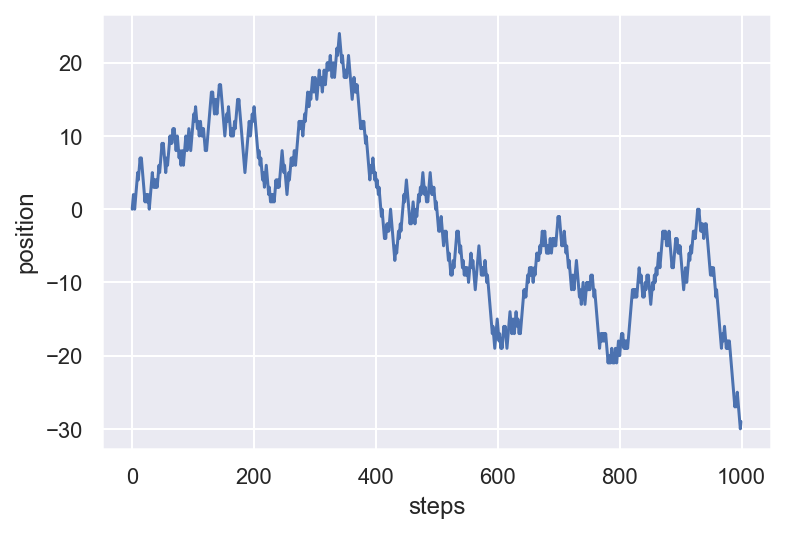

In [2]:
# simulate random numbers pulled from a uniform distribution of [0,1)

n_steps = 1000 # number of steps
position = np.zeros(n_steps) # initialize position array

p = 0.5 # probability of heads

for i in np.arange(1,n_steps):
    rand = np.random.rand()

    if rand > p:
        position[i]=position[i-1]+1
    else:
        position[i]=position[i-1]-1

plt.plot(position)
plt.xlabel("steps")
plt.ylabel("position");

In [3]:
# average behaviour of diffusing particles
# generate multiple random trajectories

def generate_random_walk(num_steps = 1000, p = 0.5):
    position = np.zeros(num_steps) # initialize position array

    for i in np.arange(1,num_steps):
        rand = np.random.rand()
        if rand > p:
            position[i]=position[i-1]+1
        else:
            position[i]=position[i-1]-1
    return position

n_arrays = 1000
random_walk = np.zeros((n_arrays,n_steps))

for i in np.arange(0,n_arrays):
    random_walk[i]=generate_random_walk()

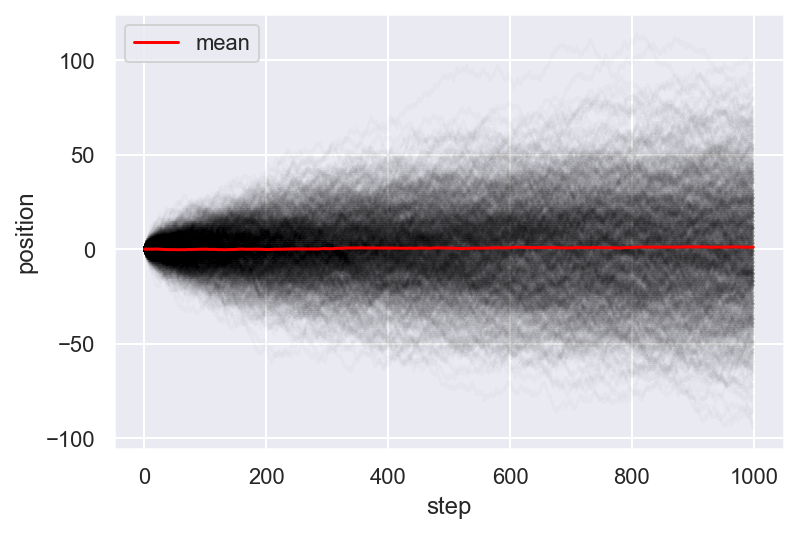

In [4]:
# compute mean trajectory
mean_pos = np.mean(random_walk,axis=0)

plt.plot(np.arange(n_steps),random_walk.T,color='black',alpha=0.02)
plt.plot(np.arange(n_steps),mean_pos,label="mean", color="red")
plt.xlabel("step")
plt.ylabel("position")
plt.legend();

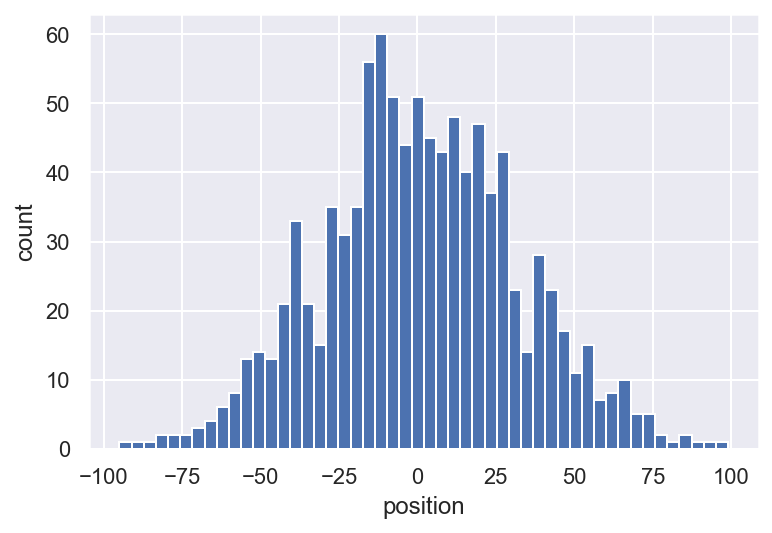

In [5]:
# extract time slice 
pos_slice = random_walk[:,999]
plt.hist(pos_slice,bins=50)
plt.xlabel("position")
plt.ylabel("count");

## Compare to binomial distribution
`stats.binom.pmf(k,n,p)` tells the probability of getting $k$ heads from $n$ coin flips given a probability $p$ of flipping heads

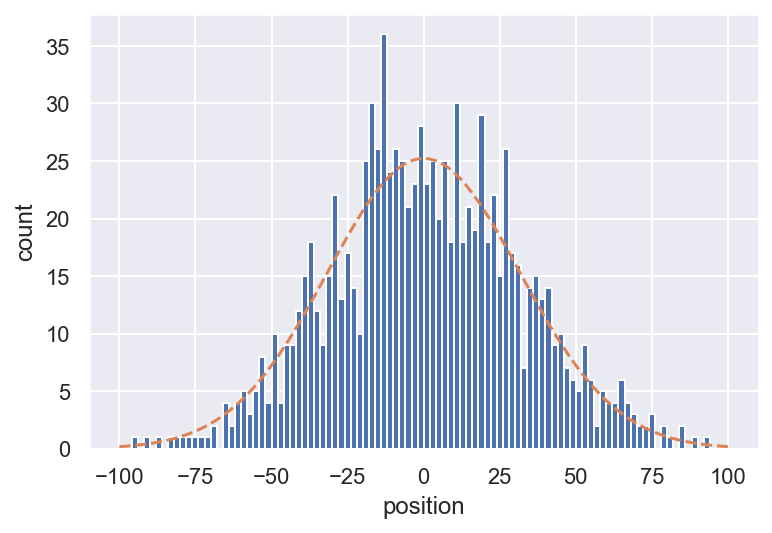

In [6]:
# make histogram of final positions, hardcoding bin positions
plt.hist(pos_slice,bins=range(-100,100,2))
plt.xlabel("position")
plt.ylabel("count");

final_positions = np.linspace(-100,100,101) # final positions occur on an interval [-100,100]

# calculate number of heads corresponding to the final_position [450,550]
n_heads = (n_steps + final_positions)/2

# generate a pmf binomial distribution, scaling by trajectories!
binomial_pmf = stats.binom.pmf(n_heads, n_steps, p=0.5) * n_arrays

plt.plot(final_positions,binomial_pmf,'--')

# Mean squared displacement
yeeeehonk

$$MSD=\left<(x-<x>)^2\right>$$
$$=\left<x^2-2x<x>+<x>^2\right>$$
$$=\langle x^2 \rangle$$

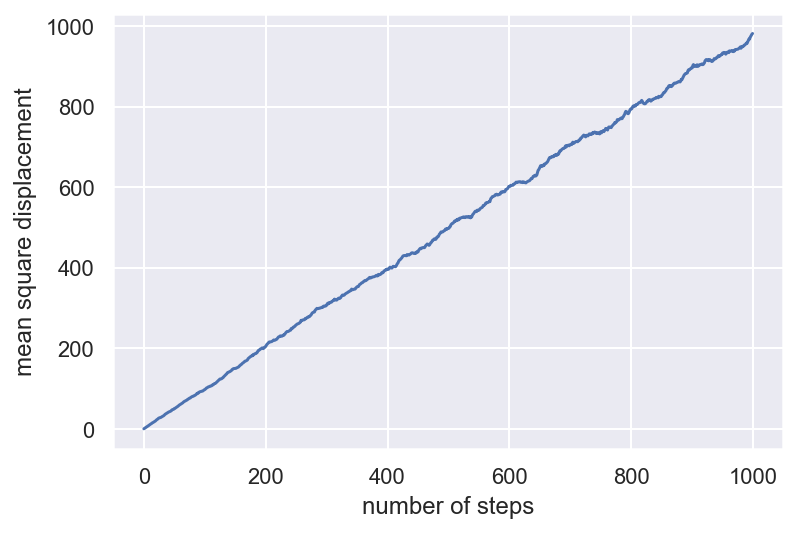

In [7]:
mean_sqr_pos = np.mean(random_walk**2,axis=0)
plt.plot(np.arange(n_steps), mean_sqr_pos)
plt.xlabel("number of steps")
plt.ylabel('mean square displacement');

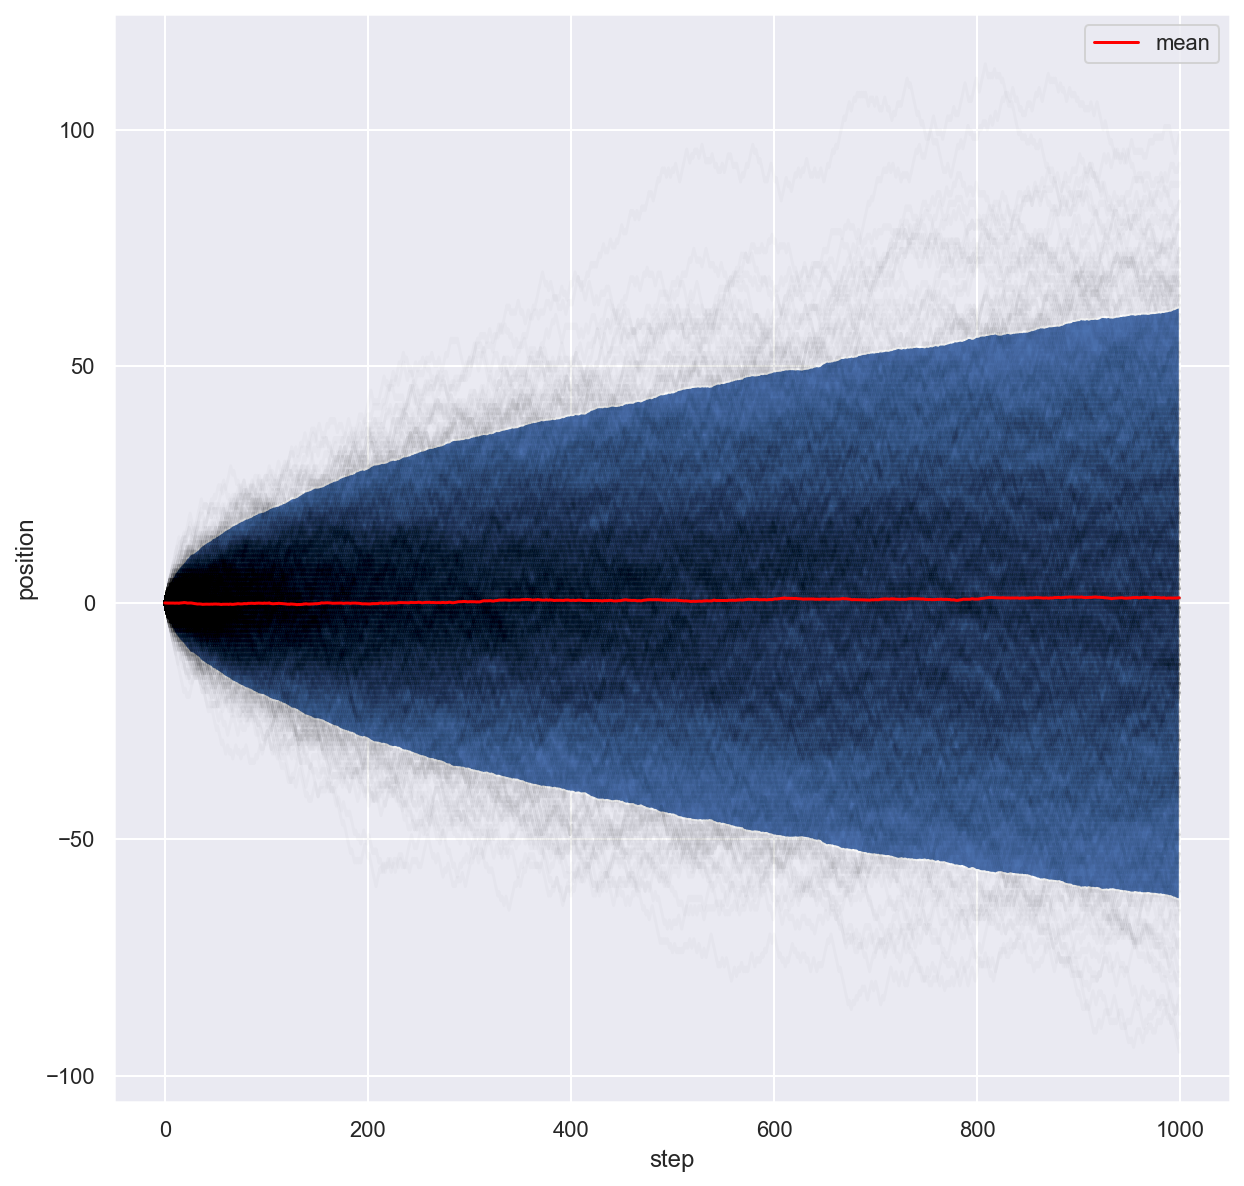

In [8]:
plt.figure(figsize=(10,10))

# plot variance in position as shaded region (2 standard deviations for 96% confidence interval)
plt.fill_between(np.arange(n_steps),-np.sqrt(mean_sqr_pos)*2, np.sqrt(mean_sqr_pos)*2)

plt.plot(np.arange(n_steps),random_walk.T,color='black',alpha=0.02)
plt.plot(np.arange(n_steps),mean_pos,label="mean", color="red")
plt.xlabel("step")
plt.ylabel("position")
plt.legend();

# Diffusion timescale

Text(0, 0.5, 'time')

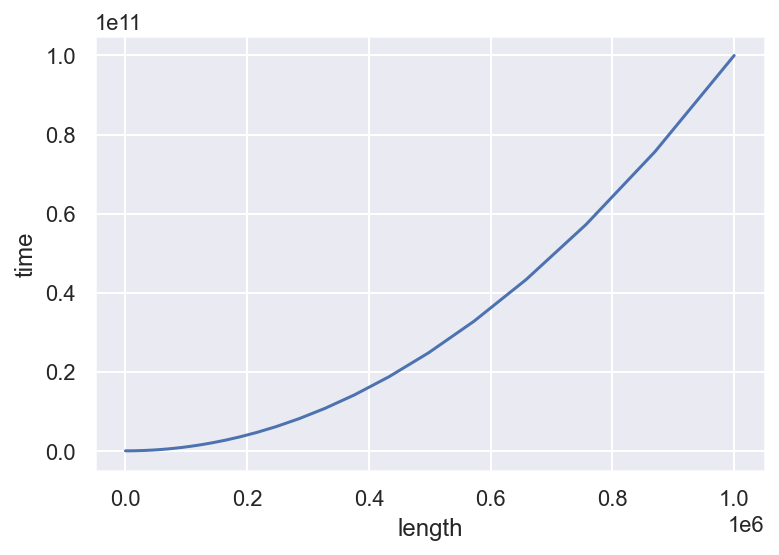

In [9]:
# diffusion constant (protein in cytoplasm)
D = 10 #um^2/s

# range of lengths in microns from 10^0 (E. coli) to 10^6 (long neuron)
L = np.logspace(0,6,100)

# diffusion time
t = L**2/D # 1/s

plt.plot(L,t)
plt.xlabel('length')
plt.ylabel('time');


# Panel things for interactive plots!

In [10]:
import panel as pn
pn.extension()

In [13]:
# define slider for coin bias
p_slider = pn.widgets.FloatSlider(
    name='p',
    start=0,
    end=1,
    step=0.05,
    value=0.5
)

# define slider for number of simulations
n_sim_slider = pn.widgets.IntSlider(
    name='number of simulations',
    start=1, 
    end=500, 
    step=1,
    value=10
)

# define slider for number of steps
n_step_slider = pn.widgets.IntSlider(
    name='number of steps',
    start=10, 
    end=1000, 
    step=10,
    value=50
)

@pn.depends(p_slider.param.value, n_sim_slider.param.value, n_step_slider.param.value)

def interact_random(p,n_sim,n_steps):
    # initialize array
    random_walk = np.zeros([n_sim,n_steps])

    for i in np.arange(0,n_sim):
        random_walk[i]=generate_random_walk(n_steps,p)
    
    # compute mean trajectory
    mean_pos = np.mean(random_walk,axis=0)

    # initialize plot
    fig, ax = plt.subplots(1,1)

    ax.plot(np.arange(n_steps), random_walk.T, color='black', alpha=0.1)
    ax.plot(np.arange(n_steps), mean_pos, color = 'red')
    plt.close(fig)

    return fig

pn.Row(interact_random,pn.Column(
    p_slider, n_sim_slider, n_step_slider)
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'a605818e-da6e-4aec-a643-dc95c4b24874': {'defs': …

Row
    [0] ParamFunction(function)
    [1] Column
        [0] FloatSlider(name='p', step=0.05, value=0.5)
        [1] IntSlider(end=500, name='number of simulations', start=1, value=10)
        [2] IntSlider(end=1000, name='number of steps', start=10, step=10, value=50)

In [12]:
len(generate_random_walk(50,0.5))

50